In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./diamonds.csv',)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 53940 rows and 10 columns


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

- Dataset doesn't had null values.

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

- Qualitative Features (Categorical) : Cut, Color, Clarity.

- Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


- By looking the stattics from from the above table `x`,`y`,`z` are had zeros.
- there is no diamond without height,weight and depth, so drop those rows.

In [7]:
# checking which rows are had zeros in x,y,z
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

- We can see here 20 rows with Dimensions `Zero`.
- We can drop then becasue every diamond has dimensions.

In [9]:
df = df[(df[['x','y','z']]!=0).all(axis=1)]

In [10]:
# just to confrim 
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [11]:
df.describe(include='object').T

,count,unique,top,freq
cut,53920,5,Ideal,21548
color,53920,7,G,11284
clarity,53920,8,SI1,13063


In [12]:
#EDA

## Univariate analysis

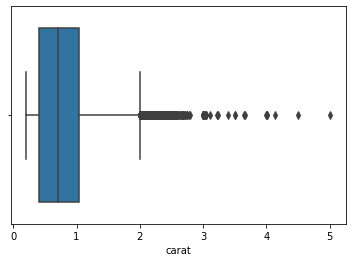

Maximum weight of Diamond is 5.01 and minimum weight is 0.2


In [13]:
sns.boxplot(x='carat',data=df)
plt.show()
print(f'''Maximum weight of Diamond is {df['carat'].max()} and minimum weight is {df['carat'].min()}''')

- Most of the weights are below 2.
- 50% Weights are in the range of `0.40` to `1.04`.

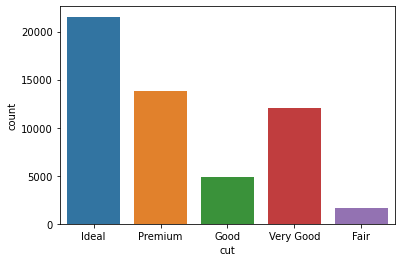

In [14]:
sns.countplot(df['cut'])
plt.show()

- By looking above plot we know that `Ideal` qulaity cut diamonds are large in number.

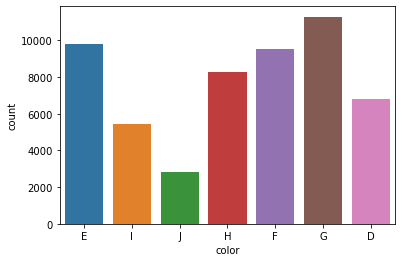

In [15]:
sns.countplot(df['color'])
plt.show()

- Diamond colour, from J (worst) to D (best)
- By looking above plot we know that color `G` diamonds are large in number and `j` color diamonds are very small in number.

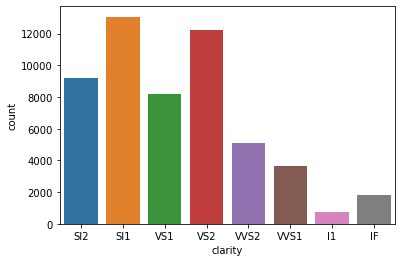

In [16]:
sns.countplot(x=df['clarity'])
plt.show()

- clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    - `SI1` type measurement of clear diamonds are most in the datset.
    - `I1` is worst diamond in measurment that are very less.
    - By looking plot we know that best and worest diamonds are very few.

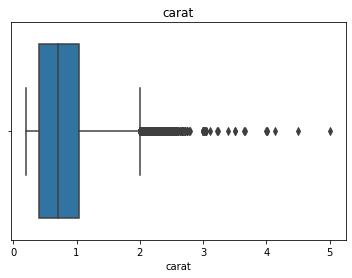

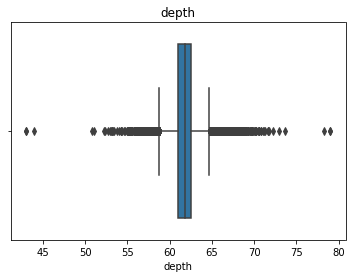

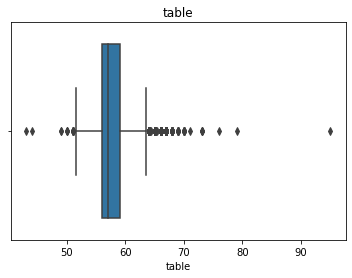

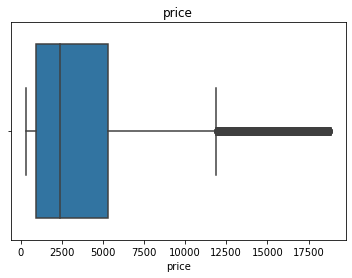

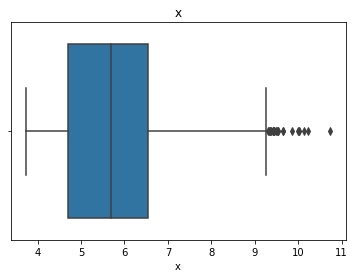

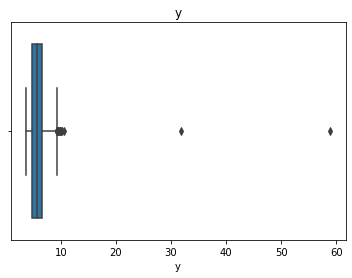

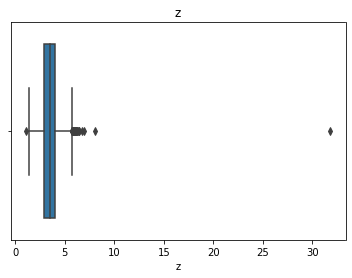

In [17]:
for col in df.select_dtypes(exclude='object'):
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

- **depth**
    - depth : total depth percentage is 43 to 79
    $$\frac{z}{mean(x, y)}$$

    $$ \frac{2*z}{x + y}$$ 
    - mean and meadian nearly equal.

- **table**
    - width of top of diamond relative to widest point 43 to 95
    - Mean of table is 57.457184, minimum value is 43 and maximum value is 95.

- **Price**
    - price in US dollars \$32 to \$18,823.

- **x**
    - length in mm 0 to 10.74
    - this is also have extreem values that will impact on mean.
    - by looking plot we know that some values present at `zero` that is not a valid measurment.


- **y**
    - width in mm 0 to 58.9
    - this is also have extreem values that will impact on mean.
    - by looking plot we know that some values present at `zero` that is not a valid measurment.

- **Z**
    - depth in mm 0 to 31.8
    - Z is had extreem values only one value is at 31.8.
    - by looking plot we know that some values present at `zero` that is not a valid measurment.

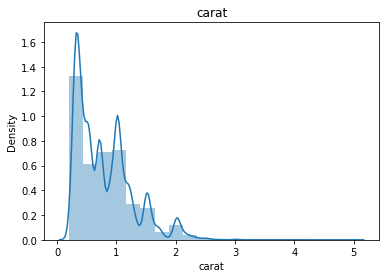

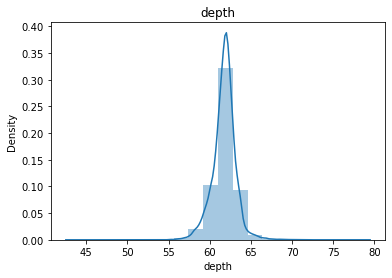

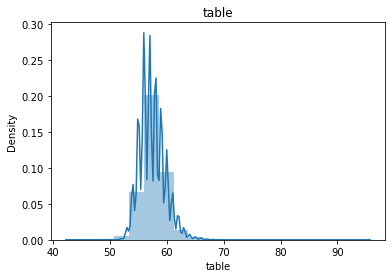

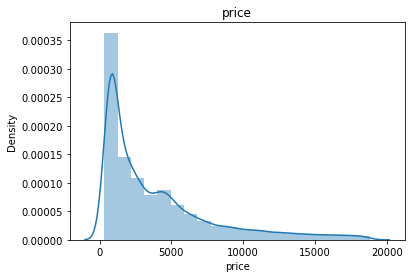

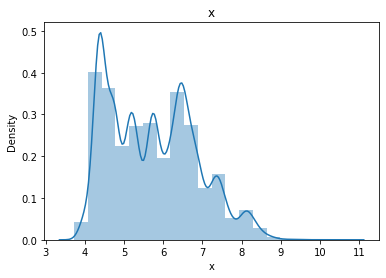

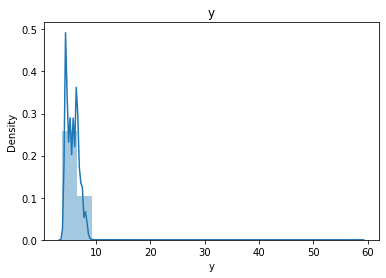

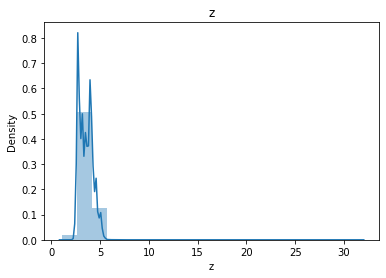

In [18]:
for col in df.select_dtypes(exclude='object'):
    plt.title(col)
    sns.distplot(df[col],bins=20)
    plt.show()

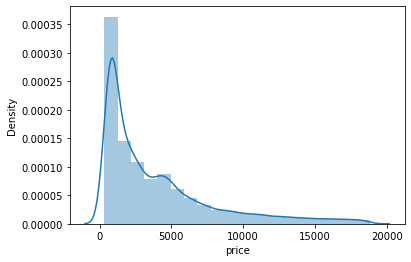

In [19]:
sns.distplot(df['price'],bins=20)
plt.show()

In [20]:
# Bivariate analysis

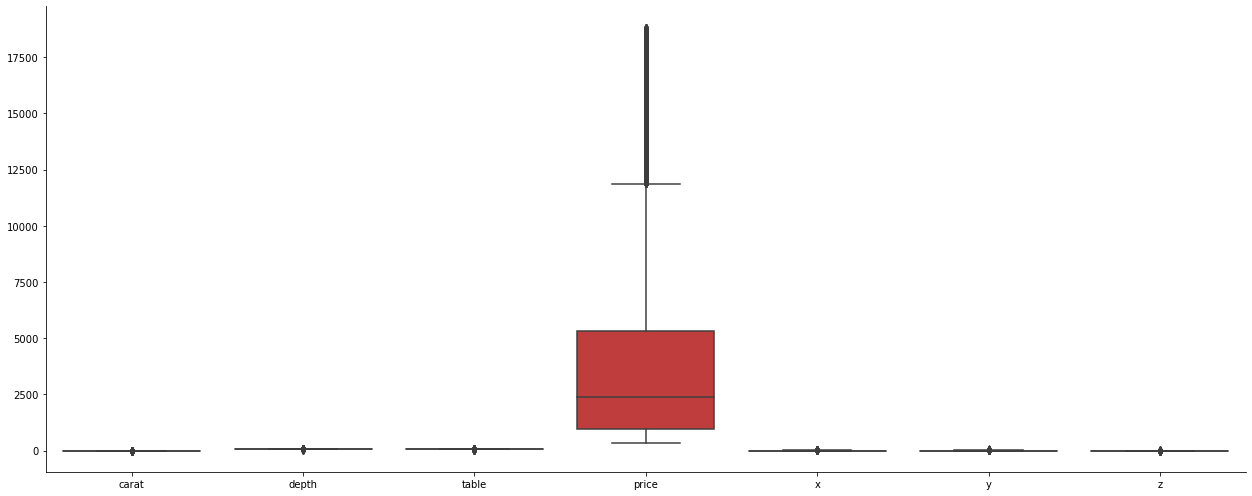

In [21]:
sns.catplot(data=df , kind='box' , size=7, aspect=2.5)
plt.show()

- The Values are Distributed over a Small Scale.

### Carat Vs Price

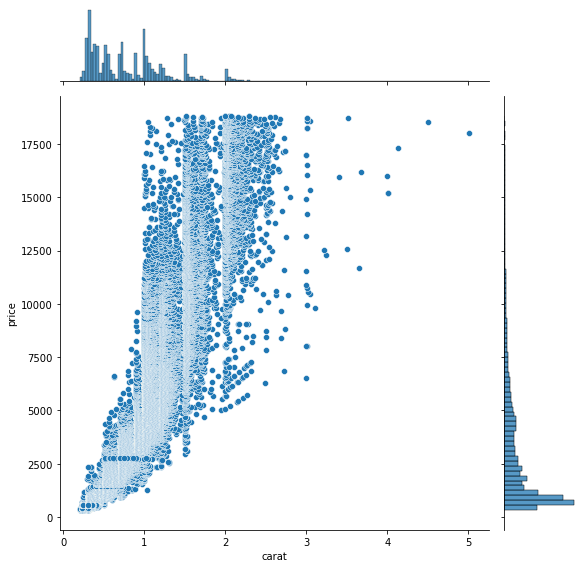

In [22]:
sns.jointplot(x='carat',y='price',data=df,size=8)
plt.show()

- By looking plot carat varies with price exponentially.

## Cut Vs Price

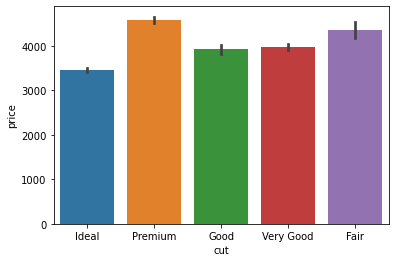

In [23]:
sns.barplot(x='cut', y='price', data=df)
plt.show()

- Premium Cut on Diamonds as we can see are the most Expensive, followed by Fair and Very Good Cut.

## Color Vs Price

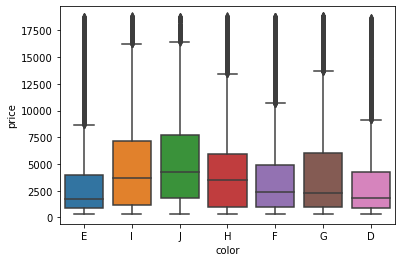

In [24]:
sns.boxplot(x='color',y='price',data=df)
plt.show()

- we can seen that average of worst color diamonds price is heigh.

## Clarity Vs Price

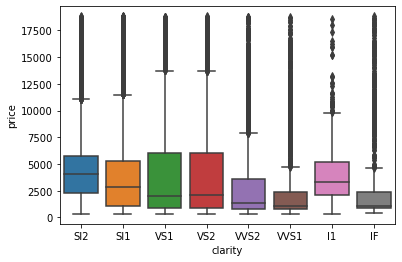

In [25]:
sns.boxplot(x='clarity', y='price', data=df)
plt.show()

- It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

## Depth Vs Price

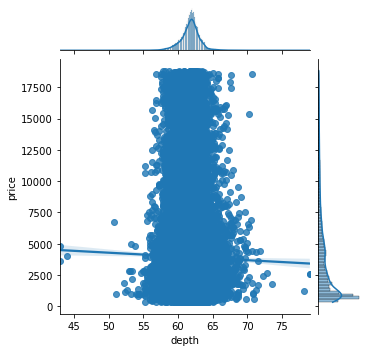

In [26]:
sns.jointplot(x='depth', y='price',kind='reg' , data=df, size=5)
plt.show()

- We can Infer from the plot that the Price can vary heavily for the same Depth.

## Table Vs Price

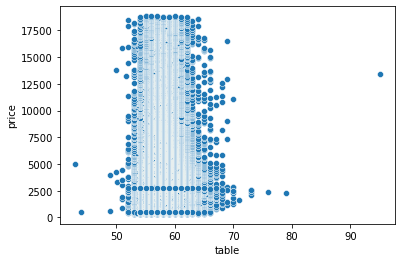

In [27]:
sns.scatterplot(x='table',y='price',data=df)
plt.show()

- We can Infer from the plot that the Price can vary heavily for the same widest point on diamond.

## X,Y,Z

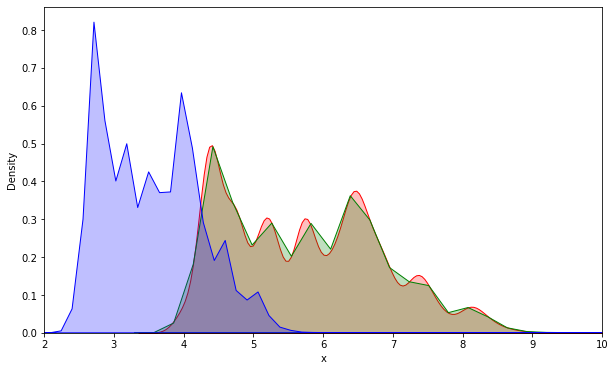

In [28]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)
plt.show()

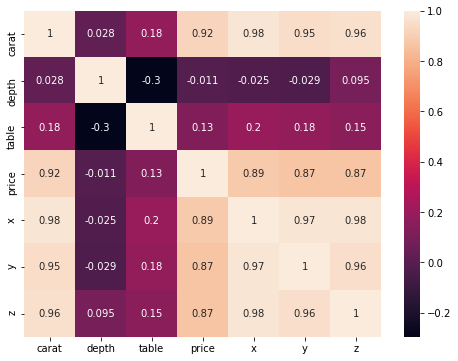

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature Engineering

## Creating new feature volume

- All the Dimensions are highly correlated so we can creating we column vloume from dimensions.

In [30]:
df['volume'] = df['x']*df['y']*df['z']

In [31]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856


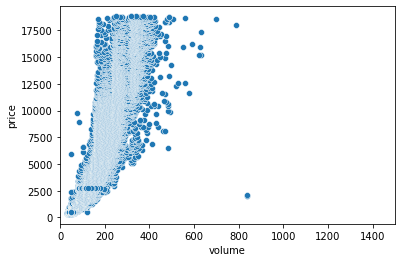

In [32]:
sns.scatterplot(x='volume',y='price',data=df)
plt.xlim(0,1500)
plt.show()

- It seems that there is Linear Relationship between Price and Volume.

## Droping x,y,z

In [33]:
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## Label Encoding

- We can't feed strings data to model so can creating numbers for categarical attributes.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [36]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856


## Feature Scaling

- split the dataset  into train , test set

In [37]:
x = df.drop(labels='price',axis=1)
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=66)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,

((43136, 7), (10784, 7), (43136,), (10784,))

In [41]:
from sklearn.preprocessing import StandardScaler

### Applying Standard scalar

In [42]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model Building

##  Linear Regression

> Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Linear regression is the most simple and popular technique for predicting a continuous variable.

- The problem was never finding the dimond price. The problem was to find the best fit line which generalises over the data well.

- line equation is : $y = mx +c$

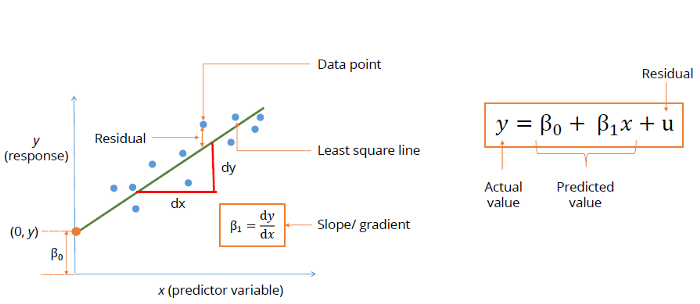

   - y — The value that you want to predict
   - β₀ — The y-intercept of the line means where the line intersects the Y-axis
   - β₁ — The slope or gradient of the line means how steep is the line
   - x — The value of the data point
   - u — The residual or noise that are caused by unexplained factors
    
     Seems like we can easily come to best parameter values by hit and trial method and thus finding the best fit line. But things are not that easy when the problem you are solving has more dimensions which is also known as the The Curse of Dimensionality.
     The Multiple Linear Regression will have n number of features and we have to find a line which fits all the data points for all the dimensions. You have started to realise that it is no longer a hit-and-trial solution.
     
     
### Pros:
   - Linear Regression is simple to implement and easier to interpret the output coefficients.
   - When you know the relationship between the independent and dependent variable have a linear relationship, this algorithm is the best to use because of it’s less complexity to compared to other algorithms.
   - Linear Regression is susceptible to over-fitting but it can be avoided using some dimensionality reduction techniques, regularization (L1 and L2) techniques and cross-validation.

### Cons:
   - In linear regression technique outliers can have huge effects on the regression and boundaries are linear in this technique.
   - Linear regression assumes a linear relationship between dependent and independent variables. That means it assumes that there is a straight-line relationship between them. It assumes independence between attributes.
   - Linear regression also looks at a relationship between the mean of the dependent variables and the independent variables. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among variables.

In [43]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
model_lr = LinearRegression()

model_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
accu = cross_val_score(estimator=model_lr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred = model_lr.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [46]:
def metric_scores(model,x_test,y_test,y_pred):
    score = model.score(x_test,y_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    #rmse = mse**0.5
    rmse = mean_squared_error(y_test,y_pred)**0.5
    r2 = r2_score(y_test,y_pred)


    print(f'Score : {score}\nMSE : {mse}\nMAE : {mae}\nRMSE : {rmse}\nR2 : {r2}')

In [47]:
metric_scores(model_lr,x_test,y_test,y_pred)

Score : 0.8813966902517504
MSE : 1911966.0791406555
MAE : 936.6130215612412
RMSE : 1382.7386156250411
R2 : 0.8813966902517503


- Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
r2_score(y_test,y_pred)

0.9784900236948451

In [50]:
metric_scores(model_rf,x_test,y_test,y_pred)

Score : 0.9784900236948451
MSE : 346755.4585607369
MAE : 305.1899831721197
RMSE : 588.8594556944271
R2 : 0.9784900236948451


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [52]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [62]:
param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 800, 1000]}

In [63]:
model_rf = RandomForestRegressor()

In [64]:
search = RandomizedSearchCV(model_rf,param_distributions=param,n_iter=20,scoring='accuracy',n_jobs=-1,cv=cv, random_state=1)

In [ ]:
#result = search.fit(x, y)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

### SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr = SVR(kernel='linear')
model_svr.fit(x_train,y_train)
y_pred = model_svr.predict(x_test)

metric_scores(model_svr,x_test,y_test,y_pred)

## GradientBoosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
model_gbr.fit(x_train,y_train)
accuracies = cross_val_score(estimator=model_gbr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred = model_gbr.predict(x_test)
print(accuracies)
metric_scoresmodel_gbr,(model_gbr,x_test,y_test,y_pred)